#Rede Neural Convolucional - AULA 01
Conceitos

MLP :  Número de  neurônios na camada anterior e  número na camada atual dará as conexões pela multiplicação, chamadas de pesos.
     - SÓ ACEITA ENTRDAS DE 1D, LINEARLIZAR A IMAGEM
     - A PROXIMA CAMADA DEVE SER DIRETAMENTE PROPORCIONAL
     - POR UM ALTO CUSTO PARA ARAMZENAR A PENAS A IMAGAME O MLÇP NÃO SERÁ USADO.
Convolução (CNN) :
                  - O Númerto de parametros da rede não é mais vinculado ao tamanho da entrada
                  - interpreta a imagem de forma mais intuitiva
                  -

# ARQUITETURA DA CNN
- TRABALHA COM VOLUMES 3D(ALTURA, LARGURA E PROFUNDIDADE)

- PROFUNDIDDAE : Canais de cor, mapa de características.
- Neuronios(3D) : possuem campo de visão limitado.
- CNN alterna em transformação e subamostragem.
- Camadas comuns : Convolucional(conv), Polling(Poll), Totalmente Concetada(FC).
- Aprendizado hierarquico





In [2]:
#Datasets
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

import torch
from torchvision import datasets, transforms


In [6]:
#dataset MINIST de digitos escritos a mão para reconhecimento do padrão em imagens, será dado por um dado, rotulo
MNIST = datasets.MNIST('.',train=False,
                       transform=transforms.ToTensor(),
                        download=True)


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [10]:
dado, rotulo = MNIST[0]
print(type(dado), type(rotulo))

<class 'torch.Tensor'> <class 'int'>


#plot de amostras do dataset

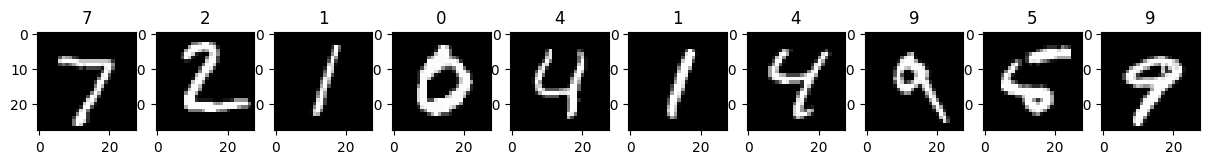

In [11]:
fig, axs = plt.subplots(1,10,figsize=(15,4))
for i in range(10):
  dado, rotulo = MNIST[i]
  axs[i].imshow(dado[0],cmap='gray')
  axs[i].set_title(str(rotulo))

A ultima camada deve ser uma de mlp conectada com a anterior cada cada digito

#Detecção
- Uso do dataset PascalVOC2012

In [13]:
VOC = datasets.VOCDetection('.',image_set='train', download=True,transform=transforms.ToTensor(),)

100%|██████████| 1999639040/1999639040 [01:33<00:00, 21398144.56it/s]


Extracting ./VOCtrainval_11-May-2012.tar to .


observar o tipo

<class 'torch.Tensor'> <class 'dict'>
torch.Size([3, 442, 500])
{'annotation': {'folder': 'VOC2012', 'filename': '2008_000008.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'}, 'size': {'width': '500', 'height': '442', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'horse', 'pose': 'Left', 'truncated': '0', 'occluded': '1', 'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'}, 'difficult': '0'}, {'name': 'person', 'pose': 'Unspecified', 'truncated': '1', 'occluded': '0', 'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'}, 'difficult': '0'}]}}


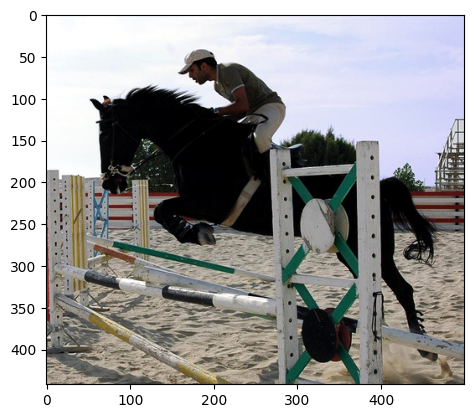

In [17]:
dado, rotulo = VOC[0]
print(type(dado), type(rotulo))
print(dado.size()) # indica que [canais de cor, tamanhox tamanho]
#obs: para as bibliotecas de vizualização muda, a utlima dimensão indica os canais de cores
dado= dado.permute(1,2,0)
plt.imshow(dado)
print(rotulo) # dicionario o rotulo

